In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, Parameter
from qiskit.quantum_info import Statevector, Operator
from qiskit import transpile


import matplotlib.pyplot as plt

import numpy as np

Let $n\in \mathbb{N}$ and let $U\in \mathcal{U}(2)$. We define the {\em multi-controlled $U$ gate} on a computational basis vector $\ket{x}_n\ket{y}\in \mathbb{C}^{2^n}\otimes \mathbb{C}^2$ by
$$
    (C^nU)\ket{x}_n\ket{y}
    =
    \begin{cases}
    \ket{x}_n U\ket{y} \quad \text{ if }x_i=1 \,\forall i\in [n]\\
    \ket{x}_n \ket{y} \quad \text{ else } 
    \end{cases}.
$$

We want to implement $C^nU$ using only single-qubit gates and CX. 

# $C^2U$ via Figure 4.10 in Nielsen-Chuang

Towards our ultimate goal of implementing $C^nU$, we first implement $C^1U$ via a decomposition of $U$ as $e^{i\alpha} AXBXC$, where $A,B,C$ are all single qubit gates which satisfy $ABC=1$.

First, Theorem 4.1 (N-C) states that every unitary $U\in \mathcal{U}(2)$ can be decomposed as $e^{i \alpha}R_z(\phi)R_y(\theta)R_z(\lambda)$ for $\alpha,\phi,\theta,\lambda\in [0,2\pi)$. However, Qiskit's function for preparing a unitary gate $U$ given the above angles and outputing $U(\phi,\theta,\lambda)$ differs by a global phase of $e^{(\phi+\lambda)/2}$, which we may want to keep track of as we follow steps outlined in Nielsen and Chuang to implement CU. In particular, what we shall denote by $U(\phi,\theta,\lambda)$ as the output of the U3 gate is actually

$$
U(\phi,\theta,\lambda)
=
\text{quantum\_ circuit.u(theta,phi,lambda,1)}
=
{\color{red} e^{(\phi+\lambda)/2}}R_z(\phi)R_y(\theta)R_z(\lambda).
$$

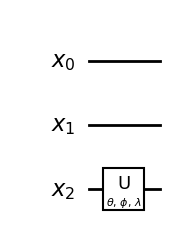

In [108]:
n = 3

quantum_register = QuantumRegister(size=n, name="x")
quantum_circuit = QuantumCircuit(quantum_register, name = 'base')


al = Parameter(r"$\alpha$")
theta = Parameter(r"$\theta$")
phi = Parameter(r"$\phi$")
lam = Parameter(r"$\lambda$")


quantum_circuit.u(theta,phi,lam, n-1)
quantum_circuit.draw(output="mpl", style="bw")


By the proof of Corollary 4.2 in Nielsen and Chuang, $U=e^{i\alpha}AXBXC$ where 
$$A=R_z(\phi)R_y(\theta/2), \quad B=R_y(-\theta/2)R_z(-(\phi + \lambda)/2),\quad \text{ and } 
\quad C=R_z(-(\phi-\lambda)/2).$$

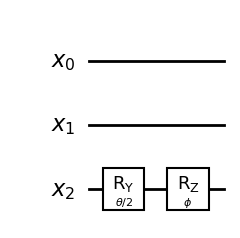

In [109]:
quantum_register = QuantumRegister(size=n, name="x")
cbits = list(range(0,n-1))
qc_A = QuantumCircuit(quantum_register, name = 'A')

qc_A.ry(theta/2,n-1)
qc_A.rz(phi,n-1)
#qc.mcp(Theta, quantum_register[:-1], quantum_register[-1])

qc_A.draw(output="mpl", style="bw")

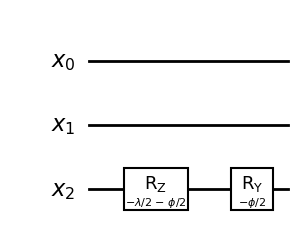

In [113]:
quantum_register = QuantumRegister(size=n, name="x")
qc_B = QuantumCircuit(quantum_register, name = 'B')

qc_B.rz(-(phi+lam)/2,n-1)
qc_B.ry(-phi/2,n-1)
#qc.mcp(Theta, quantum_register[:-1], quantum_register[-1])

qc_B.draw(output="mpl", style="bw")

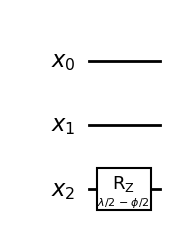

In [110]:

quantum_register = QuantumRegister(size=n, name="x")
qc_C = QuantumCircuit(quantum_register, name = 'C')

qc_C.rz(-(phi-lam)/2,n-1)
#qc.mcp(Theta, quantum_register[:-1], quantum_register[-1])

qc_C.draw(output="mpl", style="bw")

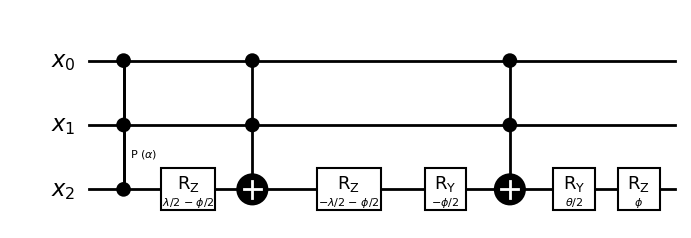

In [ ]:
quantum_register = QuantumRegister(n,'x')
cbits = list(range(0,n-1))

Controlled_U_Circuit = QuantumCircuit(quantum_register)

Controlled_U_Circuit.mcp(al,cbits,n-1)
Controlled_U_Circuit.rz(-(phi-lam)/2,n-1)
Controlled_U_Circuit.mcx(cbits,n-1)
Controlled_U_Circuit.rz(-(phi+lam)/2,n-1)
Controlled_U_Circuit.ry(-phi/2,n-1)
Controlled_U_Circuit.mcx(cbits,n-1)
Controlled_U_Circuit.ry(theta/2,n-1)
Controlled_U_Circuit.rz(phi,n-1)

Controlled_U_Circuit.draw(output="mpl", style="bw")


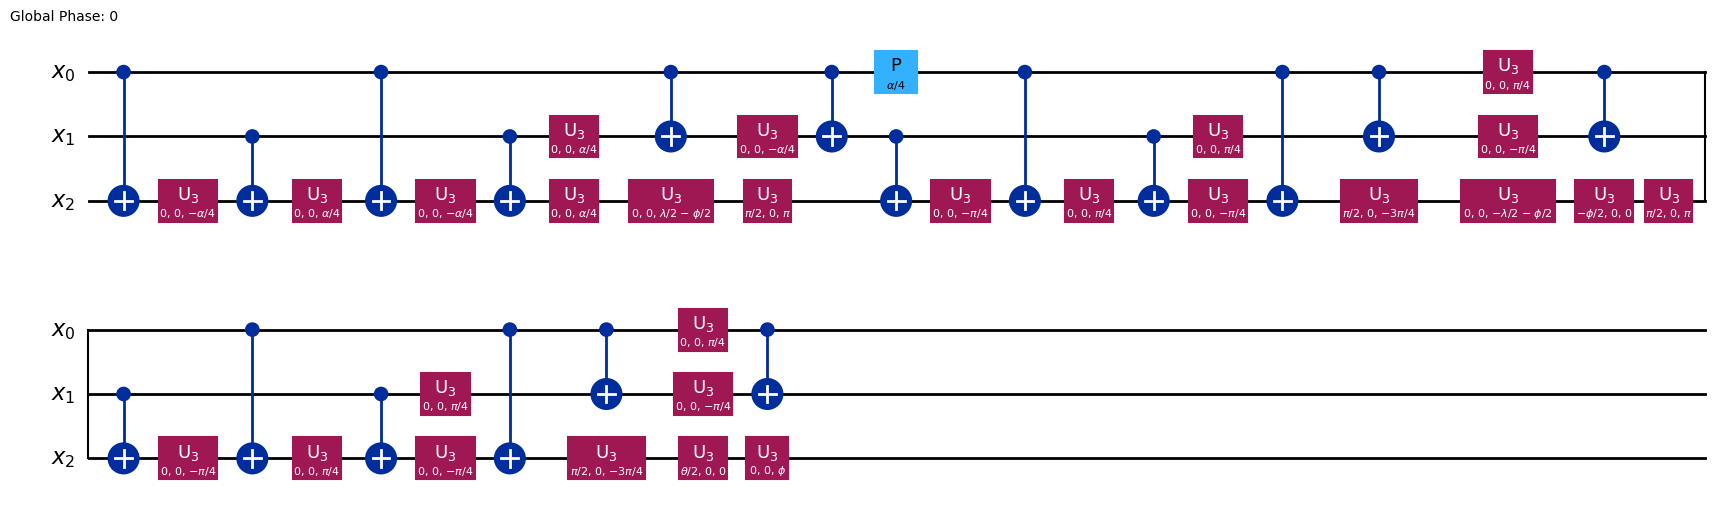

In [ ]:
decomposed_CU = transpile(Controlled_U_Circuit, basis_gates=['u3','p', 'cx'])
decomposed_CU.draw(output="mpl")

In [85]:
qr = QuantumRegister(3,'x')
qc = QuantumCircuit(qr)

qc.ccx(0,1,2)
decomposed_toffoli = transpile(qc, basis_gates=['u3', 'cx'])
decomposed_toffoli.draw(output="mpl")

tack_on_toffoli = decomposed_toffoli.to_gate()

In [101]:
n = 3
cbits = list(range(0,n-1))

quantum_register = QuantumRegister(n,'x')
quantum_circuit  = QuantumCircuit(quantum_register, name = 'base')

quantum_circuit.cp(al,cbits,n-1)
quantum_circuit.compose(app_C, inplace=True)
quantum_circuit.mcx(cbits,n-1)
quantum_circuit.compose(app_B, inplace=True)
quantum_circuit.mcx(cbits,n-1)
quantum_circuit.compose(app_A, inplace=True)

quantum_circuit.draw(output="mpl")



NameError: name 'app_C' is not defined

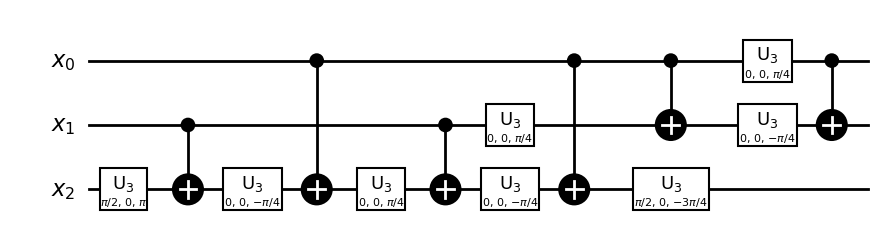

In [48]:
decomposed_qc = transpile(qc, basis_gates=['u3', 'cx'])

decomposed_qc.draw(output="mpl", style="bw")